In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re
import scienceplots

import scipy.sparse as sp
import scipy.sparse.linalg as spla


hx = 0.4
(0.0, 0) -> (0.0, 1.0)
(0.4, 0) -> (0.4, 1.0)
(0.8, 0) -> (0.8, 1.0)
(1.2, 0) -> (1.2, 1.0)
(1.6, 0) -> (1.6, 1.0)
(2.0, 0) -> (2.0, 1.0)


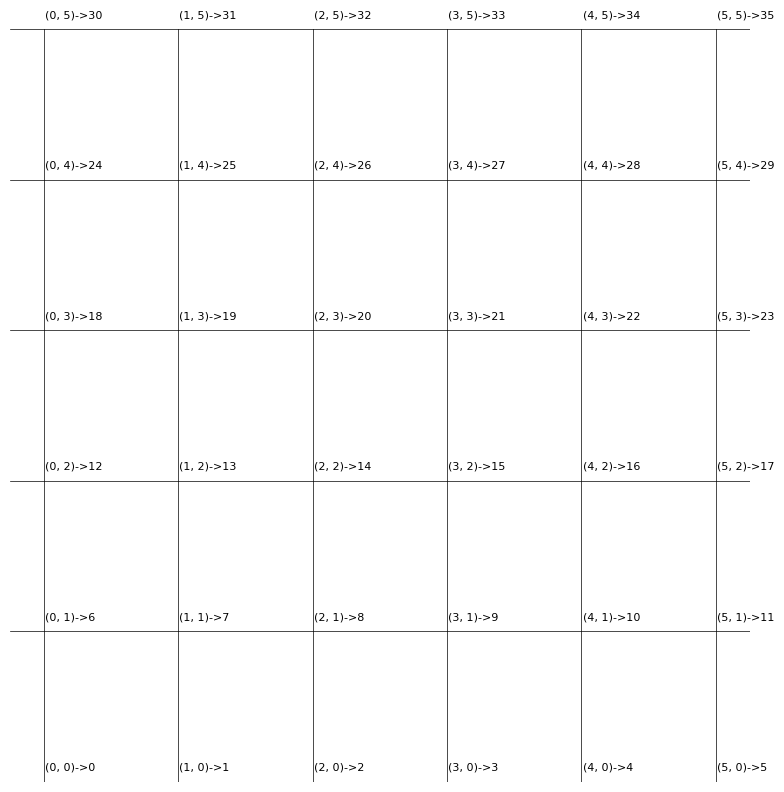

In [2]:
# Show grid lines and ticks

Lx = 2.0
Ly = 2.0
Nx = 5
Ny = 5

hx = Lx/Nx
print(f'hx = {hx}')


fig, ax = plt.subplots(figsize=(8, 8))
for i in range(Nx+1):
    ax.axvline((1.0*i)/Nx*Lx, color='k', lw=0.5)
    print(f'({i/Nx*Lx}, 0) -> ({i/Nx*Lx}, {Ly})')
for j in range(Ny+1):
    ax.axhline(j/Ny*Ly, color='k', lw=0.5)
# ax.set_xticks(np.linspace(0, Lx, Nx+1))
# ax.set_yticks(np.linspace(0, Ly, Ny+1))
# ax.set_xlim(0, Lx)
# ax.set_ylim(0, Ly)
# ax.set_xlabel(r'$x$')
# ax.set_ylabel(r'$y$')
# ax.set_aspect('equal')
ax.set_axis_off()
# Show node numbering
delta_x = 0.004
delta_y = 0.02
for i in range(Nx+1):
    for j in range(Ny+1):
        ax.text(i/Nx*Lx+delta_x, j/Ny*Ly+delta_y, f'({i}, {j})->{i+j*(Nx+1)}', ha='left', va='center', fontsize=8)

fig.tight_layout()
plt.show()

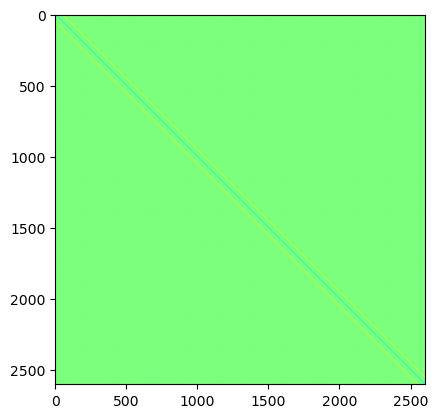

In [10]:
Lx = 2.0
Ly = 1.0
Nx = Ny = 50

hx = Lx / (Nx-1)
hy = Ly / (Ny-1)

# Matrix assembly for 5-point stencil '(Nx+1)*(Ny+1)' grid points.
A = sp.diags([1, 1, -4, 1, 1], [-Nx-1, -1, 0, 1, Nx+1], shape=((Nx+1)*(Ny+1), (Nx+1)*(Ny+1)), format='csr') 

# A[0, Nx*Nx-1] = -40

plt.imshow(A.todense(), vmin=-1, vmax=1, cmap='jet')


Shape of A: (2601, 2601)
Shape of b: (2601,)


/home/remi/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


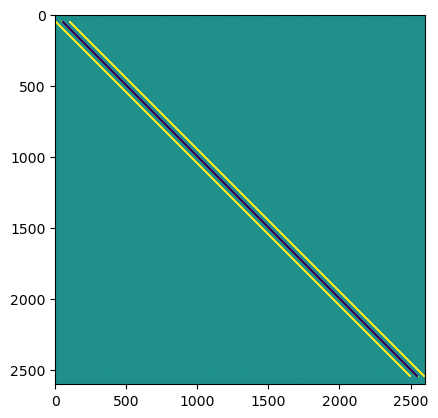

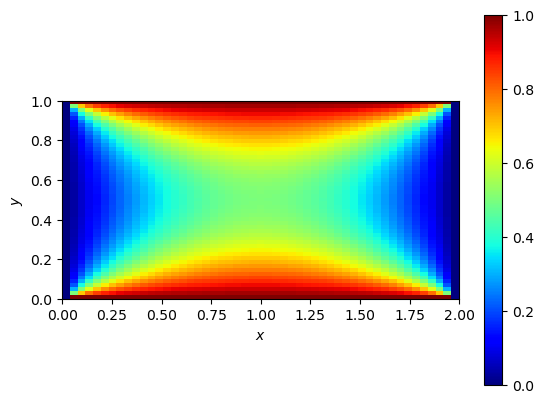

U min: 0.000
U max: 1.000


In [15]:
A = sp.diags([1, 1, -4, 1, 1], [-Nx-1, -1, 0, 1, Nx+1], shape=((Nx+1)*(Ny+1), (Nx+1)*(Ny+1)), format='csr') / (hx*hx)


print(f"Shape of A: {A.shape}")
def fxy(x, y):
    return -1.0

# RHS assembly with forcing function f(x, y).
b = np.zeros((Nx+1)*(Ny+1))
for i in range(Nx):
    for j in range(Ny):
        b[i*Nx+j] = fxy((i+0.5)*hx, (j+0.5)*hy) * hx*hx

print(f"Shape of b: {b.shape}")

Nb = 0
x = 0

Anode1 = 0.5, 1.0
Anode2 = 1.5, 1.0
Cathode1 = 1.0, 1.0

# Dirichlet boundary conditions = 0
for idx_x in range(Nx+1):
    for idx_y in range(Ny+1):
        if idx_x == 0 or idx_x == Nx or idx_y == 0 or idx_y == Ny:
            line_idx = idx_x + idx_y*(Nx+1)
            A[line_idx, :] = 0
            A[line_idx, line_idx] = 1
            b[line_idx] = 0 if idx_x == 0 or idx_x == Nx else 1





# Dirichlet boundary conditions on lef


plt.imshow(A.todense(), vmin=-1, vmax=1)

# Solve linear system
u = spla.spsolve(A, b).reshape((Nx+1, Ny+1))

# Plot solution
fig, ax = plt.subplots()
im = ax.imshow(u, origin='lower', extent=[0, Lx, 0, Ly], cmap='jet')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.colorbar(im, ax=ax)
plt.show()
# Min max
print(f'U min: {u.min():.3f}')
print(f'U max: {u.max():.3f}')




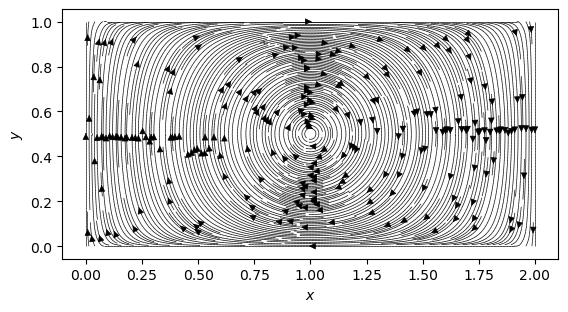

In [16]:
# Streamlines
x = np.linspace(0, Lx, Nx+1)
y = np.linspace(0, Ly, Ny+1)
X, Y = np.meshgrid(x, y)
U, V = np.gradient(u, hx, hy)
fig, ax = plt.subplots()
ax.streamplot(X, Y, U, V, color='k', linewidth=0.5, density=5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

[0.07134442 0.50726335 0.70840049 0.83148662 0.24164571 0.40537047
 0.11271605 0.005696   0.26380782 0.95900708 0.60901784 0.94691492
 0.25760551 0.98584944 0.2444135  0.4106962  0.70061001 0.70573012
 0.73577371 0.99562949 0.21754384 0.4314874  0.05869829 0.90942394
 0.77782937 0.7943775  0.39584457 0.40376193 0.80035141 0.23503211
 0.86163325 0.1671283  0.56495476 0.18708247 0.33520118 0.61531772
 0.68011484 0.82928644 0.41062535 0.70939176 0.8716354  0.92670934
 0.31718956 0.32099911 0.40806653 0.92530575 0.31560573 0.2540339
 0.65014861 0.84057238 0.70508765 0.3637548  0.2373688  0.69628781
 0.62221093 0.53995661 0.14778827 0.26917302 0.1283715  0.36537786
 0.31946909 0.38372495 0.93547583 0.50995197 0.39193074 0.02938306
 0.30511205 0.75884576 0.39503515 0.48513953 0.74251165 0.74191689
 0.02388112 0.1386666  0.53108602 0.04716568 0.35496712 0.12406102
 0.7921306  0.89178404 0.33497422 0.21995302 0.73528782 0.19037966
 0.3434982  0.2624559  0.71012703 0.00685652 0.86941188 0.68624

UnboundLocalError: local variable 'X_Part' referenced before assignment

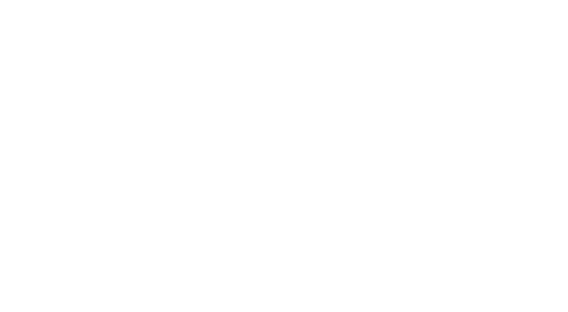

In [22]:


# Animate particles
fig, ax = plt.subplots()

ax.streamplot(X, Y, U, V, color='k', linewidth=0.5, density=5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

scat = ax.scatter(X_Part, Y_Part, s=10, c='r')

# Particle animation
def init():
    return ax,

X_Part = np.random.rand(100)
Y_Part = np.random.rand(100)
print(X_Part)

def animate(i):
    NewX_Part = X_Part + U[np.round(X_Part/hx).astype(int), np.round(Y_Part/hy).astype(int)]*hx
    NewY_Part = Y_Part + V[np.round(X_Part/hx).astype(int), np.round(Y_Part/hy).astype(int)]*hy
    scat.set_offsets([NewX_Part, NewY_Part])
    X_Part = np.copy(NewX_Part)
    Y_Part = np.copy(NewY_Part)



anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True, repeat=False)
anim.save("DDPD.mp4")